# Ao3 Tags on "Fix-it Fics" as an Indicator of Satisfying Endings #

Are there common themes among fix it fics that show what audiences crave that shows lack? To answer this, I will scrape data from Archive of Our Own (Ao3) to compare tags used on “fix it” fanfictions, or fanfictions that aim to give the show a “better” ending, across the shows Voltron, Supernatural, and Star Wars: The Sequel Trilogy. The answer to this question could be used to suggest what themes audiences are wanting to see in media in general and could be used as a recommendation to media writers on how to create “satisfying” endings. 


## Data Collection ##

To do this, I will use the following packages.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

I request data from Ao3 using the requests library. I did some work on Ao3's actual page as it would be easier than generate the url, which I was unsure how to do. There is not a lot of documentation on how Ao3 works, as seen by the lack of API, so all urls will be generated on the actual Ao3 site and then pasted over.



### Playing with the Data ###

I wanted to see how to scrape Ao3, so I used Voltron as a test. I obtained the website url to scrape from by doing a manual search on Ao3's website. Ao3 lists 20 fanfics per page, so this will have 20 fanfics worth of tags. Tags are not limited, so this is entirely dependent on what the author decided to list when publishing the fic. I also decided to exclude any explicit labeled fanfictions for the sake of this being a school project and having to present this data. This works out for the overall mission as well, as all of the fandoms I chose are aired on TV and follow FCC guidelines on how graphic their content can be for TV-14/PG-13.

In [2]:
page = requests.request("GET", 'https://archiveofourown.org/tags/Voltron:%20Legendary%20Defender/works?commit=Sort+and+Filter&exclude_work_search%5Brating_ids%5D%5B%5D=13&page=1&utf8=%E2%9C%93&work_search%5Bcomplete%5D=&work_search%5Bcrossover%5D=&work_search%5Bdate_from%5D=&work_search%5Bdate_to%5D=&work_search%5Bexcluded_tag_names%5D=&work_search%5Blanguage_id%5D=&work_search%5Bother_tag_names%5D=Fix-It&work_search%5Bquery%5D=&work_search%5Bsort_column%5D=revised_at&work_search%5Bwords_from%5D=&work_search%5Bwords_to%5D=')

In [3]:
page

<Response [200]>

In [4]:
soup = bs(page.text, "html.parser")

I looked through the soup in order to find what html tags contained the "tag" items that I will need for my analysis. In this case, it is in linked items (<a/href>) with the class "tag".

In [5]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"232243a405","applicationID":"129290979","transactionName":"cVtXEUpbWFxdQhkUXEBfSkpRWlBVQA==","queueTime":0,"applicationTime":161,"agent":""}</script>
<script>(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"232243a405",applicationID:"129290979"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(){}function i(t,e,n,r){return function(){return s.recordSupportability("API/"+e+"/called"),o(t+e,[u.now()]

In [6]:
tags = soup.find_all('a', class_='tag')

With this, I can clean up the list so it just contains what is inside the tags.

In [7]:
tags

[<a class="tag" href="/tags/Voltron:%20Legendary%20Defender">Voltron: Legendary Defender</a>,
 <a class="tag" href="/tags/Voltron:%20Legendary%20Defender/works">Voltron: Legendary Defender</a>,
 <a class="tag" href="/tags/Voltron%20-%20Fandom/works">Voltron - Fandom</a>,
 <a class="tag" href="/tags/Choose%20Not%20To%20Use%20Archive%20Warnings/works">Creator Chose Not To Use Archive Warnings</a>,
 <a class="tag" href="/tags/Adam*s*Shiro%20(Voltron)/works">Adam/Shiro (Voltron)</a>,
 <a class="tag" href="/tags/Adam%20*a*%20Shiro%20(Voltron)/works">Adam &amp; Shiro (Voltron)</a>,
 <a class="tag" href="/tags/Adam%20*a*%20Keith%20(Voltron)/works">Adam &amp; Keith (Voltron)</a>,
 <a class="tag" href="/tags/Keith%20*a*%20Shiro%20(Voltron)/works">Keith &amp; Shiro (Voltron)</a>,
 <a class="tag" href="/tags/Allura*s*Lance%20(Voltron)/works">Allura/Lance (Voltron)</a>,
 <a class="tag" href="/tags/Hunk%20*a*%20Shiro%20(Voltron)/works">Hunk &amp; Shiro (Voltron)</a>,
 <a class="tag" href="/tags/Pid

In [8]:
tagList = [x.text for x in soup.find_all('a', class_='tag')]

In [9]:
tagList

['Voltron: Legendary Defender',
 'Voltron: Legendary Defender',
 'Voltron - Fandom',
 'Creator Chose Not To Use Archive Warnings',
 'Adam/Shiro (Voltron)',
 'Adam & Shiro (Voltron)',
 'Adam & Keith (Voltron)',
 'Keith & Shiro (Voltron)',
 'Allura/Lance (Voltron)',
 'Hunk & Shiro (Voltron)',
 'Pidge | Katie Holt & Shiro',
 'Allura & Coran & Hunk & Keith & Lance & Pidge | Katie Holt & Shiro',
 'Allura & Coran & Hunk & Keith & Krolia & Lance & Pidge | Katie Holt & Romelle & Shiro',
 'Shiro & Sven (Voltron)',
 'Hunk/Shay (Voltron)',
 'Shiro (Voltron)',
 'Adam (Voltron)',
 'Hunk (Voltron)',
 'Lance (Voltron)',
 'Keith (Voltron)',
 'Allura (Voltron)',
 'Pidge | Katie Holt',
 'Matt Holt',
 'Sam Holt',
 'Colleen Holt',
 'Bae Bae (Voltron)',
 'Coran (Voltron)',
 'Krolia (Voltron)',
 'Iverson (Voltron)',
 'Veronica (Voltron)',
 'James Griffin (Voltron)',
 'Ina Leifsdottir',
 'Nadia Rizavi',
 'Ryan Kinkade',
 'Sven (Voltron)',
 'Sendak (Voltron)',
 'Haggar (Voltron)',
 'Shay (Voltron)',
 'Romelle

And with that, I have a list of tags for the first 20 fix-it fanfics from Voltron in Ao3. 


### Function Creation ###
Now that I have learned how to scrape the tags from Ao3, I will create a function that can take the fandom name, a data frame, and how many pages to iterate through as parameters and spit out a data frame of tags for that fandom. The function can be used as long as you use the exact phrase used for the fandom as Ao3 does. If it is your first time using the function, use an empty data frame. In order to keep appending onto that data frame, feed that same data frame into the function when using a different fandom title. The function will a dataframe with two columns: one with the tags and the other with the name of the fandom that tag came from.

The first part of the function is where the showName is changed so the spaces are replaced with "%20", as that is how the url reads spaces. The function updates the showName and then iterates through each page requested, scraping tags from each page. It then goes back through to add the final column of the "Fandom" is came from.

In [10]:
def getTags(showName, df, getPages):
    pageNum = 1
    x = 0
    showNameParse = showName.split()
    showNameAddSpace = ""
    for word in showNameParse:
        showNameAddSpace = showNameAddSpace + showNameParse[x] + "%20"
        x += 1
    #print(showNameAddSpace)
    temp_df = pd.DataFrame()
    while pageNum < getPages:
        page = requests.request("GET", "https://archiveofourown.org/tags/" + showNameAddSpace + "/works?commit=Sort+and+Filter&exclude_work_search%5Brating_ids%5D%5B%5D=13&page=" + str(pageNum) + "&utf8=%E2%9C%93&work_search%5Bcomplete%5D=&work_search%5Bcrossover%5D=&work_search%5Bdate_from%5D=&work_search%5Bdate_to%5D=&work_search%5Bexcluded_tag_names%5D=&work_search%5Blanguage_id%5D=&work_search%5Bother_tag_names%5D=Fix-It&work_search%5Bquery%5D=&work_search%5Bsort_column%5D=revised_at&work_search%5Bwords_from%5D=&work_search%5Bwords_to%5D=")
        soup = bs(page.text, "html.parser")
        tagList = [x.text for x in soup.find_all('a', class_='tag')]
        temp_df = temp_df.append(tagList, ignore_index=True)
        pageNum += 1
        for x in temp_df:
            temp_df["Fandom"] = showName
    df = df.append(temp_df, ignore_index=True)
    return df

### Voltron ###

I chose Voltron for this project due to its notoriety of having a disliked ending by the fans. I will use my function to obtain the tags from the first 5 pages. 5 is a somewhat arbitrary number. This will gather tags for the first 100 fanfictions.

In [11]:
tag_df = pd.DataFrame()
final_tagList = getTags("Voltron: Legendary Defender", tag_df, 5)

In [12]:
final_tagList.head(30)

,0,Fandom
0,Voltron: Legendary Defender,Voltron: Legendary Defender
1,Voltron: Legendary Defender,Voltron: Legendary Defender
2,Voltron - Fandom,Voltron: Legendary Defender
3,Creator Chose Not To Use Archive Warnings,Voltron: Legendary Defender
4,Adam/Shiro (Voltron),Voltron: Legendary Defender
5,Adam & Shiro (Voltron),Voltron: Legendary Defender
6,Adam & Keith (Voltron),Voltron: Legendary Defender
7,Keith & Shiro (Voltron),Voltron: Legendary Defender
8,Allura/Lance (Voltron),Voltron: Legendary Defender
9,Hunk & Shiro (Voltron),Voltron: Legendary Defender


### Supernatural ###

Now that I have 100 fanfics worth of tags for Voltron, I will repeat this process for the tv show Supernatural, chosen for its popularity as the subject of fanfiction (over 240,000 fics!) and for its bad ending. 

Since I have already worked out what tags I need and how I can get them from this site, I will be condensing my process to fewer cells with less explanation.

In [13]:
final_tagList = getTags("Supernatural", final_tagList, 5)

In [14]:
final_tagList

,0,Fandom
0,Voltron: Legendary Defender,Voltron: Legendary Defender
1,Voltron: Legendary Defender,Voltron: Legendary Defender
2,Voltron - Fandom,Voltron: Legendary Defender
3,Creator Chose Not To Use Archive Warnings,Voltron: Legendary Defender
4,Adam/Shiro (Voltron),Voltron: Legendary Defender
...,...,...
5244,15x20 coda,Supernatural
5245,this happened before dean met up with sam you ...,Supernatural
5246,Ficlet,Supernatural
5247,i wrote this immediately after watching that g...,Supernatural


### Star Wars: The Sequel Trilogy ###

This fandom is different than the previous two chosen as it is much bigger than Voltron or even Supernatural since it encompasses many different movies and tv shows. When I chose Star Wars, I did so because I personally did not like the ending to Star Wars Episode IX Rise of Skywalker. I did a preliminary check and found fix-it fanfics for that movie. However, when choosing which fandom website to sort and scrape, I found that there were 11 categories for the Star Wars media franchise. Rather than look through all of the media, which was a category, I chose to stay true to what made me pick Star Wars in general and chose the "Star Wars: The Sequel Trilogy" fandom since it includes Rise of Skywalker.

Despite this being a movie trilogy rather than a tv show, I do not expect this media difference to affect tag usage and preferences among fix-it fanfics. 

In [15]:
final_tagList = getTags("Star Wars Sequel Trilogy", final_tagList, 5)

In [16]:
final_tagList

,0,Fandom
0,Voltron: Legendary Defender,Voltron: Legendary Defender
1,Voltron: Legendary Defender,Voltron: Legendary Defender
2,Voltron - Fandom,Voltron: Legendary Defender
3,Creator Chose Not To Use Archive Warnings,Voltron: Legendary Defender
4,Adam/Shiro (Voltron),Voltron: Legendary Defender
...,...,...
7795,Post-Star Wars: The Rise of Skywalker,Star Wars Sequel Trilogy
7796,Star Wars: The Rise of Skywalker Fix-It,Star Wars Sequel Trilogy
7797,Ben Solo Lives,Star Wars Sequel Trilogy
7798,Happy Ending,Star Wars Sequel Trilogy


## Data Visualization ##

The aspect I am interested in this data is how frequently a certain tag appears within the list. Frequency can be measured a few ways within the data. I will create a pivot table to find and organize the duplicates and then use that information to find the modes within the data. 

In [17]:
final_tagList.pivot_table(columns=[0], aggfunc ='size')

0
#DeanStudies                                                       1
#ReleaseTheRianJohnsonCut                                          1
(Very) gradual Finn/Poe                                            1
(briefly) - Freeform                                               1
(but not in the sexy way)                                          1
                                                                  ..
yell about your feelings its healthy                               1
yes I know it's 2021 but I don't care this ship still slaps        1
you can get the google chrome add on to put in your name though    1
you're the reader                                                  1
zethrid                                                            1
Length: 3401, dtype: int64

In [36]:
final_tag_pivot_both = final_tagList.pivot_table(columns=[0, 'Fandom'], aggfunc ='size')
final_tag_pivot_all = final_tagList.pivot_table(columns=[0], aggfunc = 'size')

In [37]:
final_tag_pivot_both

0                                                                Fandom                     
#DeanStudies                                                     Supernatural                   1
#ReleaseTheRianJohnsonCut                                        Star Wars Sequel Trilogy       1
(Very) gradual Finn/Poe                                          Star Wars Sequel Trilogy       1
(briefly) - Freeform                                             Star Wars Sequel Trilogy       1
(but not in the sexy way)                                        Star Wars Sequel Trilogy       1
                                                                                               ..
yell about your feelings its healthy                             Voltron: Legendary Defender    1
yes I know it's 2021 but I don't care this ship still slaps      Voltron: Legendary Defender    1
you can get the google chrome add on to put in your name though  Supernatural                   1
you're the reader        

In [38]:
final_tag_pivot_all

0
#DeanStudies                                                       1
#ReleaseTheRianJohnsonCut                                          1
(Very) gradual Finn/Poe                                            1
(briefly) - Freeform                                               1
(but not in the sexy way)                                          1
                                                                  ..
yell about your feelings its healthy                               1
yes I know it's 2021 but I don't care this ship still slaps        1
you can get the google chrome add on to put in your name though    1
you're the reader                                                  1
zethrid                                                            1
Length: 3401, dtype: int64

In [21]:
pd.set_option("display.max_rows", 10)

<AxesSubplot:ylabel='0,Fandom'>

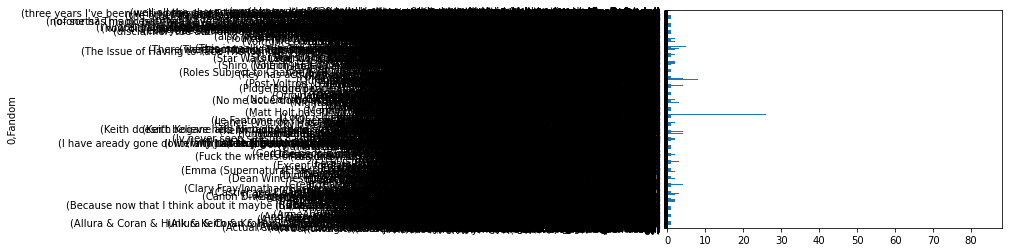

In [23]:
final_tag_pivot_both.plot.barh()

<AxesSubplot:ylabel='0'>

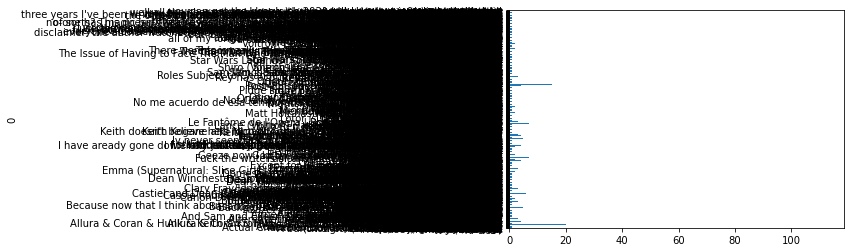

In [24]:
final_tag_pivot_all.plot.barh()

In [ ]:
np.round(final_tagList.pivot_table(columns=[0], aggfunc = [stats.mode]))

So, I was able to find an easy way to get the duplicates without iterating by making a pivot table, which we did cover in class but I had forgotten about! The next step is to filter out all of the tags that are below 5 or 10 duplicates so I can actually read the graph that currently looks like the void. I am not sure the best way to do this. Perhaps I can create a new data frame based on filtering the pivot table? I will have to play around with it some more.

In [ ]:
test_df = final_tagList

In [41]:
final_tag_pivot_both.keys()

MultiIndex([(                                                   '#DeanStudies', ...),
            (                                      '#ReleaseTheRianJohnsonCut', ...),
            (                                        '(Very) gradual Finn/Poe', ...),
            (                                           '(briefly) - Freeform', ...),
            (                                      '(but not in the sexy way)', ...),
            (                                                     '(otra vez)', ...),
            (                                 '(there is eventual sex though)', ...),
            (                     '(though not as prevalent as the first fic)', ...),
            (                                                     '10 Plagues', ...),
            (                                                     '15x20 coda', ...),
            ...
            (                                       'will there be sex? Maybe', ...),
            (                         